In [5]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

ModuleNotFoundError: No module named 'fbprophet'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [14]:
df = pd.read_csv('airline.csv')

In [15]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [19]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [20]:
df.shape

(145, 2)

#### There is a missing value which we can drop it from without any problem.


In [21]:
df.dropna(axis=0, inplace=True)

In [22]:
df.shape

(144, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


#### Month column is object so we need to convert it inot DataTime

In [23]:

df['Month'] = pd.to_datetime(df['Month'])

#### Renaming the columns as necessary for Prophet

In [38]:
df = df.rename(columns={'Month': 'ds',
                        'Thousands of Passengers': 'y'})

df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


#### Set ds as Index and Visualize the data

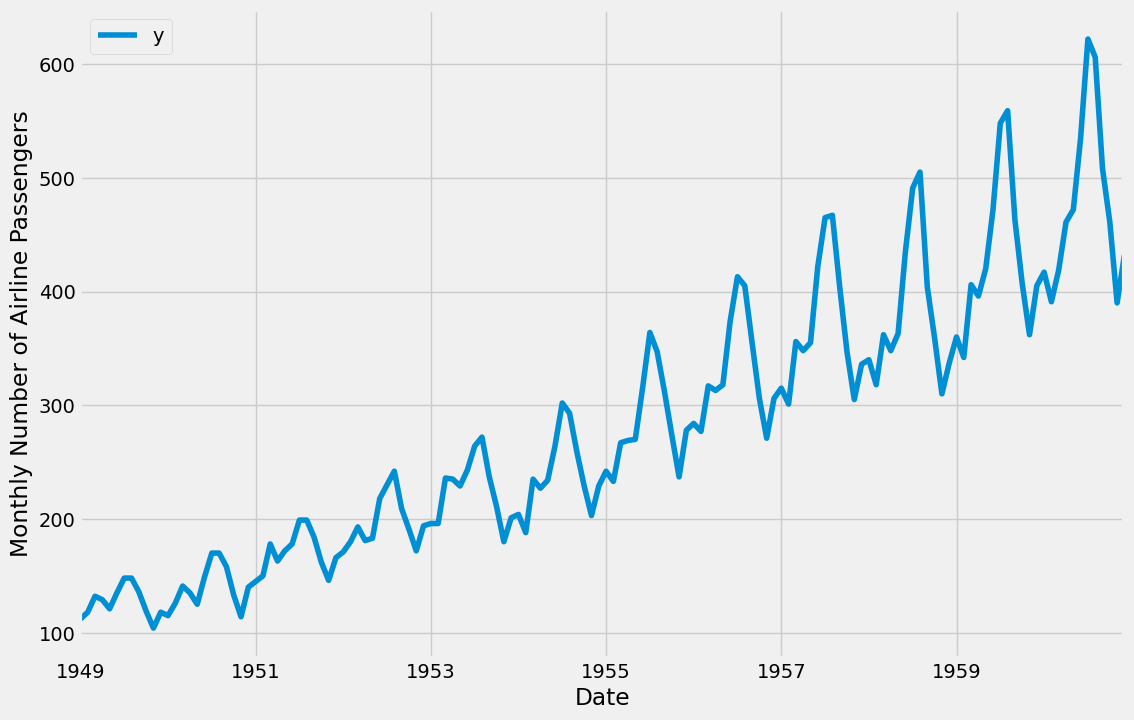

In [39]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

### Fitting Prophet

In [40]:
from prophet import Prophet

In [41]:
model = Prophet()

In [43]:
model.fit(df)

17:47:09 - cmdstanpy - INFO - Chain [1] start processing
17:47:09 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [47]:
forecast = model.predict(future_dates)

In [51]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,54.386159,115.460786,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,51.658970,109.330014,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,82.086561,139.136930,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,76.577323,136.697758,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,82.835866,140.654490,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.432599,619.083241,680.407286,579.665373,585.274817,67.416031,67.416031,67.416031,67.416031,67.416031,67.416031,0.0,0.0,0.0,649.848630
176,1963-09-01,585.549994,574.687380,632.660729,582.659577,588.505412,16.794932,16.794932,16.794932,16.794932,16.794932,16.794932,0.0,0.0,0.0,602.344925
177,1963-10-01,588.566827,537.304939,593.269983,585.536847,591.576759,-22.281598,-22.281598,-22.281598,-22.281598,-22.281598,-22.281598,0.0,0.0,0.0,566.285229
178,1963-11-01,591.684222,505.978066,562.476131,588.521756,594.884071,-57.349389,-57.349389,-57.349389,-57.349389,-57.349389,-57.349389,0.0,0.0,0.0,534.334833


In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,54.386159,115.460786
1,1949-02-01,78.227931,51.658970,109.330014
2,1949-03-01,110.342237,82.086561,139.136930
3,1949-04-01,107.810718,76.577323,136.697758
4,1949-05-01,111.266255,82.835866,140.654490


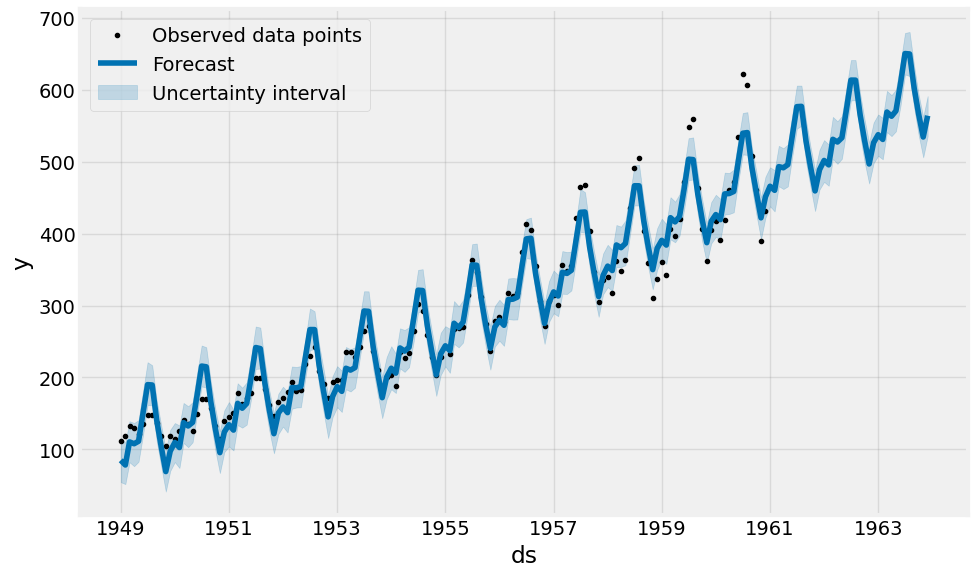

In [56]:
model.plot(forecast, uncertainty=True)
plt.legend()
plt.show()

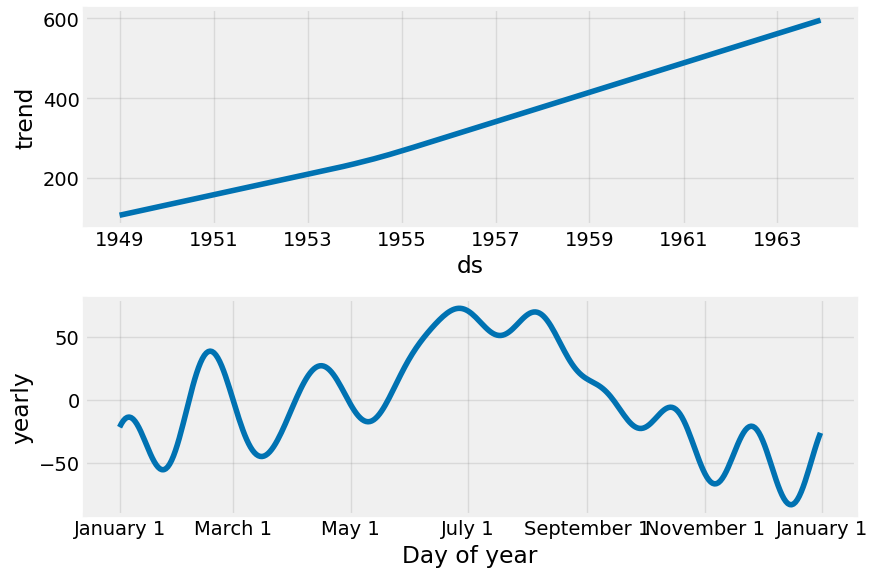

In [59]:
model.plot_components(forecast)
plt.show()